# Predictive coding/free energy

## Notation:
; seperates the random variable from the parameters of the distribution

for simiplcity P=probabilty  p=prior


f(x;μ, Σ) this is the probability density function (PDF) density of a univariate normal distribution with mean μ and variance Σ

pdf: probabilty that describes the likelihood of a randaom variable taking a particular value

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi is="true">f</mi>
  <mrow is="true">
    <mo is="true">(</mo>
    <mi is="true">x</mi>
    <mo is="true">;</mo>
    <mi is="true">&#x3BC;</mi>
    <mo is="true">,</mo>
    <mi is="true">&#x3A3;</mi>
    <mo is="true">)</mo>
  </mrow>
  <mo is="true">=</mo>
  <mfrac is="true">
    <mrow is="true">
      <mn is="true">1</mn>
    </mrow>
    <mrow is="true">
      <msqrt is="true">
        <mrow is="true">
          <mn is="true">2</mn>
          <mi is="true">&#x3C0;</mi>
          <mi is="true">&#x3A3;</mi>
        </mrow>
      </msqrt>
    </mrow>
  </mfrac>
  <mo is="true">exp</mo>
  <mrow is="true">
    <mo is="true">(</mo>
    <mo is="true">&#x2212;</mo>
    <mfrac is="true">
      <mrow is="true">
        <msup is="true">
          <mrow is="true">
            <mrow is="true">
              <mo is="true">(</mo>
              <mi is="true">x</mi>
              <mo is="true">&#x2212;</mo>
              <mi is="true">&#x3BC;</mi>
              <mo is="true">)</mo>
            </mrow>
          </mrow>
          <mrow is="true">
            <mn is="true">2</mn>
          </mrow>
        </msup>
      </mrow>
      <mrow is="true">
        <mn is="true">2</mn>
        <mi is="true">&#x3A3;</mi>
      </mrow>
    </mfrac>
    <mo is="true">)</mo>
  </mrow>
  <mtext is="true">.</mtext>
</math>




## Example 1:

Organism infer size of food.
One light sensitive recepot providing noisy estimate of light

v = diameter of food item

u = light intensity

g =  non linear-function relating to average light intensity

g(v) = v2 (amount of light reflected is related to area of object)

percived light intensity is normally distributed with mean g(v) and variance Σμ


Probability of u given v can be calulcated as:

- P(u|v) = f(u;g(v), Σμ)

which is the same as f(x;μ, Σ) 
    
- x is the variable

- μ is the mean (or g(v))

- Σ is the variance 



Organism can redefine its guess by combing prior information on how large the food will be (Assume the animal expects this size to be normally distributed with mean vp and Σp)

P(v) = f(v; vp, Σp) 

- PDF with priors 


### Bayes therom (exact solution)

p(v|u) = p(v)p(u|v) / p(u)

p(u) is the normalization term to ensure posterior probabilities of p(v|u) are integrated to 1:
- p(u) = ∫p(v)p(u|v)dv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0.5, 0, 'Food diameter')

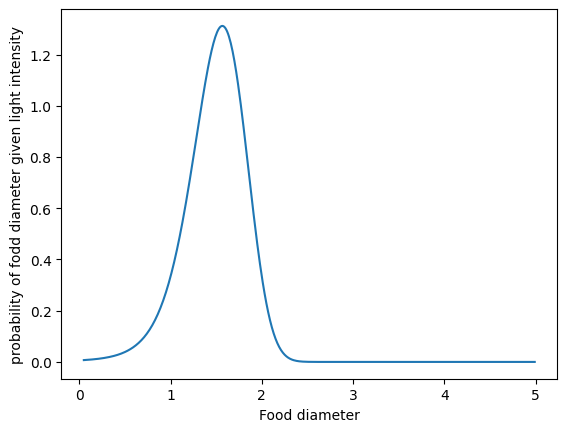

In [18]:
u=2
recptor_noise=1
vp=3
variance_prior=1
min_v=0.05
max_v=5.0
dv = 0.01
vals = np.arange(min_v, max_v, dv)
# P(v) = f(v;vp, Σp) 
p_v_1 = stats.norm.pdf(vals, loc=vp, scale=recptor_noise)
# P(u|v) = f(u;g(v), Σμ)
p_u_v = stats.norm.pdf(u, loc=vals ** 2, scale=variance_prior)
# p(v)p(u|v) 
num = p_v_1 * p_u_v
demon = np.sum(num * dv)
p = num/ demon
plt.plot(vals, p)
plt.ylabel("probability of fodd diameter given light intensity")
plt.xlabel("Food diameter")

This is challenging as for biological systems 